In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
data = pd.read_csv('ratio_values', header=None, names=['valeur'])


Text(0, 0.5, 'Fréquence')

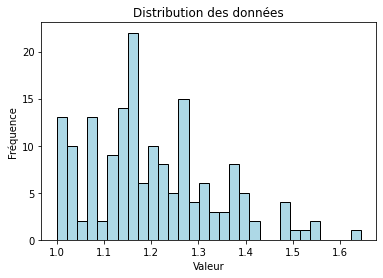

In [ ]:
plt.hist(data['valeur'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution des données')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

Text(0, 0.5, 'Fréquence')

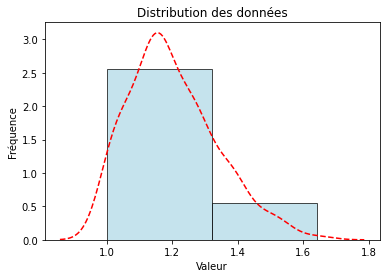

In [ ]:
plt.hist(data['valeur'], bins=2, color='lightblue', edgecolor='black', alpha=0.7, density=True)

sns.kdeplot(data['valeur'], color='red', linestyle='--')

plt.title('Distribution des données')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

In [2]:
from ete3 import NCBITaxa
import pandas as pd

ncbi = NCBITaxa()

In [18]:
tenta_df = []
with open('ratio_values', 'r+') as reader:
    for line in reader.readlines():
        line = line.strip()
        if line.startswith('>') == True:
            taxid = line.lstrip('>')
            lineage = ncbi.get_lineage(taxid)
            taxonomy = ncbi.get_taxid_translator(lineage)
            species = ncbi.get_taxid_translator([taxid])[int(taxid)]
            superorder = taxonomy[lineage[18]]
        elif line.startswith('<') == True:
            krab = int(line.split('\t')[1])
            ssxrd = int(line.split('\t')[2])
            zf = int(line.split('\t')[3])
        else:
            tenta_df.append([taxid, species, superorder, line, krab, ssxrd, zf])


In [20]:
plot_df = pd.DataFrame(tenta_df, columns=['Taxid', 'Species name', 'Superorder', 'Ratio', 'KRAB', 'SSXRD', 'ZF'])
pd.set_option("display.max_rows", None)
plot_df.to_csv('plotdata.csv', sep=';')

In [21]:
plot_df

,Taxid,Species name,Superorder,Ratio,KRAB,SSXRD,ZF
0,345717,Pieris macdunnoughi,Endopterygota,1.1683168316831682,0,0,1
1,2961670,Neodiprion virginianus,Endopterygota,1.0822281167108752,0,0,1
2,1163346,Diorhabda sublineata,Endopterygota,1.0818181818181818,0,0,1
3,66420,Papilio xuthus,Endopterygota,1.2019230769230769,0,0,1
4,50390,Diabrotica virgifera virgifera,Endopterygota,1.0132596685082873,0,0,1
5,50390,Diabrotica virgifera virgifera,Endopterygota,1.1638418079096047,0,0,1
6,50390,Diabrotica virgifera virgifera,Endopterygota,1.173134328358209,0,0,1
7,1035111,Leguminivora glycinivorella,Endopterygota,1.2525458248472505,0,0,0
8,1035111,Leguminivora glycinivorella,Endopterygota,1.1995637949836422,0,0,0
9,1035111,Leguminivora glycinivorella,Endopterygota,1.1341991341991342,0,0,0


In [9]:
with open('ratio_values', 'r+') as reader:
    data = []
    for line in reader.readlines():
        line = line.strip()
        if line.startswith('>') == True:
            taxid = line.lstrip('>')
            lineage = ncbi.get_lineage(taxid)
            taxonomy = ncbi.get_taxid_translator(lineage)
            data.append([taxid]+[taxonomy[k] for k in lineage])
columns = ['Taxid']+ [str(i) for i in range(max([len(data[j]) for j in range(len(data))])-1)]
print(len(columns))

36


In [10]:
sorted_tax = pd.DataFrame(data, columns=columns)
sorted_tax.columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [12]:
sorted_tax = sorted_tax.sort_values(by=columns)
# sorted_tax
sorted_tax.to_csv('sorted_taxonomy.csv', sep= ';')
